In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.integrate import solve_ivp

from models import *
import stars

from stars.rto.master_vkc import MasterVKC
from stars.rto.reactions import Component, Kinetics

%load_ext autoreload
%autoreload 2

In [22]:
##### SET CONSTANTS FOR ALL SIMULATIONS
TFINAL = 300
TEMP_MAX = 750
T0 = 25.0
O2_init = 0.21
So = 0.1

# Generate Synthetic Data

Use Cinar (2011) reaction model: 
\begin{align*}
1.0 Oil + 4.00 O_2 &\rightarrow 10.00 Coke_1 + 22.389 H_2O  \\
1.0 Coke_1 + 1.50 O_2 &\rightarrow 1.0CO + 1.0 CO_2  \\
1.0 Coke_1 &\rightarrow 2.0 Coke_2 \\
1.0 Coke_2 + 1.4375 O_2 &\rightarrow 0.5 CO + 1.0 CO_2
\end{align*}
from Ogunbanwo (2018). 

Run for heating rates: 2, 3, 5, 6, 10, 12, 15, 16, 20, 25, 30 C/min. Use subsets of this data for evaluating interpolation and extrapolation models. 

Also run STARS models for two non-linear heating curves. 


In [4]:
# Run example data

exp_dir = 'namla_example_data'
heating_rates = [2.0, 3.0, 5.0, 10.0, 12.0, 15.0, 20.0]
# heating_rates = [2.0, 5.0, 12.0, 20.0]

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}
exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

for hr in heating_rates:
    
    # Run STARS simulation
    data_folder = os.path.join('datasets','synthetic',exp_dir)
    cd_path = os.path.join(data_folder,str(hr))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr, 
                        TFINAL=TFINAL, TEMP_MAX = TEMP_MAX, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join(data_folder, str(hr) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2']*100)
    plt.plot(t, ydict['CO']*100)
    plt.plot(t, ydict['CO2']*100)
    plt.plot(t, ydict['N2']*100)
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Heating Rate=' + str(hr))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature - Heating Rate='+str(hr))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()
    

In [5]:
# Run interpolation cases
exp_dir = 'namla_interpolation_data'
heating_rates = [6.0, 16.0]

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}
exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

for hr in heating_rates:
    
    # Run STARS simulation
    data_folder = os.path.join('datasets','synthetic',exp_dir)
    cd_path = os.path.join(data_folder,str(hr))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr, 
                        TFINAL=TFINAL, TEMP_MAX = TEMP_MAX, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join(data_folder, str(hr) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2']*100)
    plt.plot(t, ydict['CO']*100)
    plt.plot(t, ydict['CO2']*100)
    plt.plot(t, ydict['N2']*100)
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Heating Rate=' + str(hr))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature - Heating Rate='+str(hr))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

In [6]:
# Run extrapolation heating rates
exp_dir = 'namla_extrapolation_data'
heating_rates = [25.0, 30.0]

IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}
exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'

for hr in heating_rates:
    
    # Run STARS simulation
    data_folder = os.path.join('datasets','synthetic',exp_dir)
    cd_path = os.path.join(data_folder,str(hr))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr, 
                        TFINAL=TFINAL, TEMP_MAX = TEMP_MAX, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join(data_folder, str(hr) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2']*100)
    plt.plot(t, ydict['CO']*100)
    plt.plot(t, ydict['CO2']*100)
    plt.plot(t, ydict['N2']*100)
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Heating Rate=' + str(hr))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature - Heating Rate='+str(hr))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

In [23]:
# Run nonlinear heating curves

exe_path = '"C:\\Program Files (x86)\\CMG\\STARS\\2017.10\\Win_x64\\EXE\\st201710.exe"'
Time = np.arange(0,TFINAL,1)
heating_schedule1 = np.asarray([15.0]*20 + [2.5]*40 + [-4.5]*90 + [9.5]*150) # Curve 1

hrs1 = 5.0 + 5*np.sin(Time[:100]/2/np.pi)
hrs2 = -1.5 + 3*np.sin(Time[100:200]/2/np.pi)
hrs3 = 3.5 + 5*np.sin(Time[200:]/2/np.pi)
heating_schedule2 = hrs1.tolist() + hrs2.tolist() + hrs3.tolist()

hr_list = [heating_schedule1, heating_schedule2]
IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': T0}

# Run STARS simulation
for i, hr in enumerate(hr_list):
    
    Temp = np.minimum(cumtrapz(hr, Time, initial=T0), TEMP_MAX)
    hr_dict = {'Time': Time, 'Temp': Temp}
    
    cd_path = os.path.join('datasets','synthetic','namla_arbitrary_data','schedule_'+str(i+1))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr_dict, 
                        TFINAL=TFINAL, TEMP_MAX = TEMP_MAX, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(cd_path + '.xls')
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2']*100)
    plt.plot(t, ydict['CO']*100)
    plt.plot(t, ydict['CO2']*100)
    plt.plot(t, ydict['N2']*100)
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - Schedule #' + str(i+1))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature -Schedule #'+str(i+1))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()


# Simulation Examples
Use dataset with 2.0, 3.0, 5.0, 10.0, 12.0, 15.0, and 20.0 C/min heating data. All training and testing data are generated from same reaction and kinetic cell models. 

C:\Users\timmya\Documents\Research\NAML\models.py:180: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  convplt.show()
C:\Users\timmya\Documents\Research\NAML\models.py:191: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  gradplt.show()


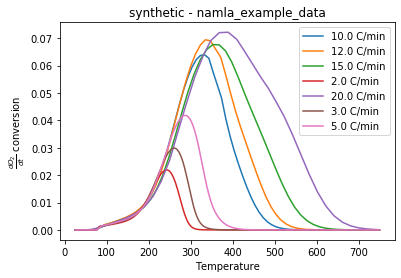

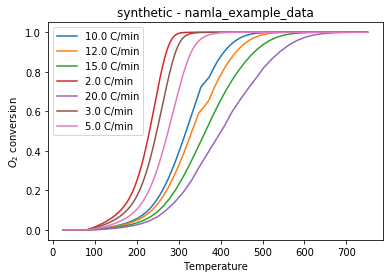

In [14]:
nainterp = NonArrheniusInterp(oil_type='synthetic', experiment='namla_example_data',clean_data=False)
naml_unc = NonArrheniusML(oil_type='synthetic', experiment='namla_example_data',clean_data=False)
naml_const = NonArrheniusML(oil_type='synthetic', experiment='namla_example_data',clean_data=False,constrained=True)

nainterp.print_consumption_curves(save_path=os.path.join('results','synthetic_data_plots','demo_data.png'))

Minimum conversion rate: -1.1543167767336496e-16, maximum conversion rate: 0.07204006185205047


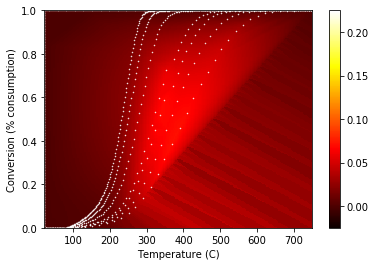

Minimum conversion rate: -0.002661389178740741, maximum conversion rate: 0.20711253799469842


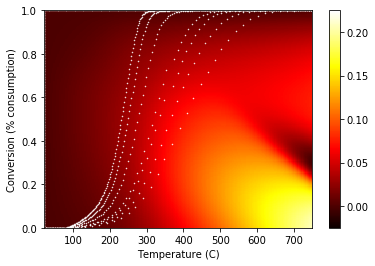

Minimum log-std. dev.: -9.909604808102955, maximum log-std. dev.: -4.543701015342179


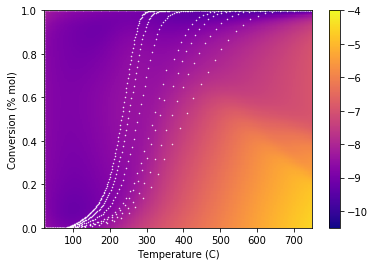

Minimum conversion rate: 0.0, maximum conversion rate: 0.20711253799469842


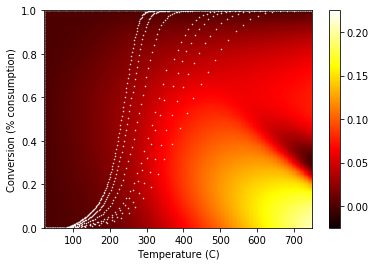

Minimum log-std. dev.: -10.457147063246772, maximum log-std. dev.: -4.546844128866267


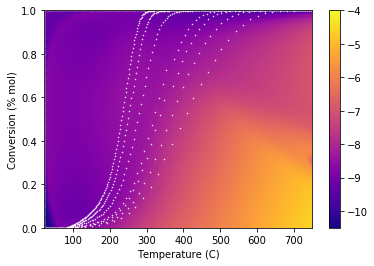

In [25]:
nainterp.print_surf_plot(save_path=os.path.join('results','synthetic_data_plots','interp_surf.png'),vmin=-0.025,vmax=0.225)
naml_unc.print_surf_plot(save_path=os.path.join('results','synthetic_data_plots','namla_surf.png'),vmin=-0.025,vmax=0.225)
naml_unc.print_uncertainty_surf(save_path=os.path.join('results','synthetic_data_plots','namla_uncert_surf.png'),vmin=-10.5,vmax=-4)
naml_const.print_surf_plot(save_path=os.path.join('results','synthetic_data_plots','namlac_surf.png'),vmin=-0.025,vmax=0.225)
naml_const.print_uncertainty_surf(save_path=os.path.join('results','synthetic_data_plots','namlac_uncert_surf.png'),vmin=-10.5,vmax=-4)

### Simulation with interpolated heating schedules
Train on heating schedules and interpolate for 6.0 C/min and 16.0 C/min

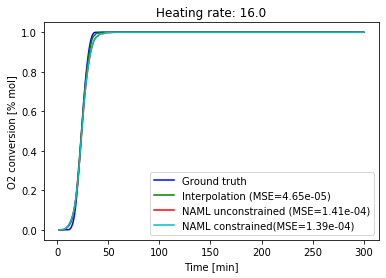

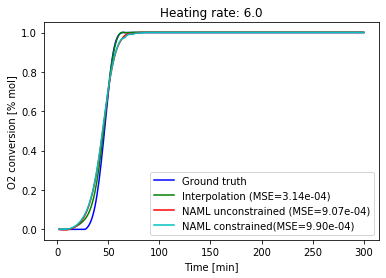

In [19]:
# Load data
data_container = NonArrheniusInterp(oil_type='synthetic', experiment='namla_interpolation_data')

for i, hr in enumerate(data_container.heating_rates):
    Time = data_container.Times[i,:]/60
    Temp = data_container.Temps[i,:]
    O2 = data_container.O2convs[i,:]
    
    
    plt.plot(Time, O2, 'b')
    plt.xlabel('Time [min]')
    plt.ylabel('O2 conversion [% mol]')
    plt.title('Heating rate: {}'.format(hr))
    
    y0=[0.0]
    tspan=[Time[0], Time[-1]]
    heating=[Time, Temp]
    t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_interp, np.squeeze(y_interp),'g')
    MSE_interp = np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)
    
    t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_ml, np.squeeze(y_ml),'r')
    MSE_ml = np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)
    
    t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_mlc, np.squeeze(y_mlc),'c')
    MSE_mlc = np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)
    
    plt.legend(['Ground truth', 'Interpolation (MSE={0:.2e})'.format(MSE_interp), \
                'NAML unconstrained (MSE={0:.2e})'.format(MSE_ml), 'NAML constrained(MSE={0:.2e})'.format(MSE_mlc)])
    plt.savefig(os.path.join('results','synthetic_simulation_plots','interpolation_hr{}.png'.format(hr)))
    plt.show()



### Simulation with extrapolated heating schedules
Train on heating schedules excluding 25.0 and 30.0 and evaluate for these.

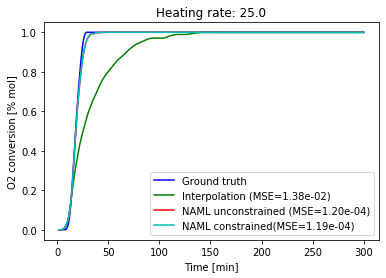

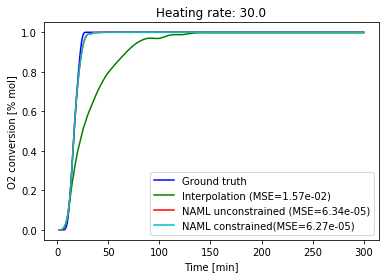

In [20]:
# Load data
data_container = NonArrheniusInterp(oil_type='synthetic', experiment='namla_extrapolation_data')

for i, hr in enumerate(data_container.heating_rates):
    Time = data_container.Times[i,:]/60
    Temp = data_container.Temps[i,:]
    O2 = data_container.O2convs[i,:]
    
    plt.plot(Time, O2, 'b')
    plt.xlabel('Time [min]')
    plt.ylabel('O2 conversion [% mol]')
    plt.title('Heating rate: {}'.format(hr))
    
    y0=[O2[0]]
    tspan=[Time[0], Time[-1]]
    heating=[Time, Temp]
    t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_interp, np.squeeze(y_interp),'g')
    MSE_interp = np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)
    
    t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_ml, np.squeeze(y_ml),'r')
    MSE_ml = np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)
    
    t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_mlc, np.squeeze(y_mlc),'c')
    MSE_mlc = np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)
    
    plt.legend(['Ground truth', 'Interpolation (MSE={0:.2e})'.format(MSE_interp), \
                'NAML unconstrained (MSE={0:.2e})'.format(MSE_ml), 'NAML constrained(MSE={0:.2e})'.format(MSE_mlc)])
    plt.savefig(os.path.join('results','synthetic_simulation_plots','extrapolation_hr{}.png'.format(hr)))
    plt.show()


### Simulation with arbitrary heating schedule

Running for heating rate schedule_1...


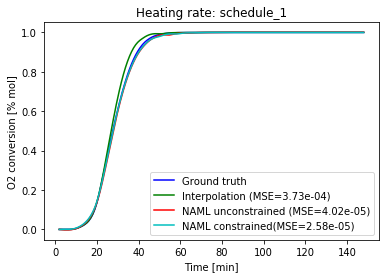

Running for heating rate schedule_2...


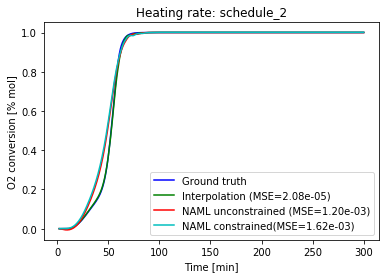

In [24]:
# Load data
data_container = NonArrheniusInterp(oil_type='synthetic', experiment='namla_arbitrary_data', clean_data=False)

for i, hr in enumerate(data_container.heating_rates):
    print('Running for heating rate {}...'.format(hr))
    Time = data_container.Times[i,:]/60
    Temp = data_container.Temps[i,:]
    O2 = data_container.O2convs[i,:]
    
    plt.plot(Time, O2, 'b')
    plt.xlabel('Time [min]')
    plt.ylabel('O2 conversion [% mol]')
    plt.title('Heating rate: {}'.format(hr))
    
    y0=[0]
    tspan=[Time[0], Time[-1]]
    heating=[Time, Temp]
    t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_interp, np.squeeze(y_interp),'g')
    MSE_interp = np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)
    
    t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_ml, np.squeeze(y_ml),'r')
    MSE_ml = np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)
    
    t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_mlc, np.squeeze(y_mlc),'c')
    MSE_mlc = np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)
    
    plt.legend(['Ground truth', 'Interpolation (MSE={0:.2e})'.format(MSE_interp), \
                'NAML unconstrained (MSE={0:.2e})'.format(MSE_ml), 'NAML constrained(MSE={0:.2e})'.format(MSE_mlc)])
    plt.savefig(os.path.join('results','synthetic_simulation_plots','arbitrary_schedule{}.png'.format(i)))
    plt.show()

### Simulation with difficult initial condition --- OMIT THIS PART

In [7]:
# Run curves for non-laboratory initial conditions

hr = 10.0
Temp_inits = [50.0, 100.0, 200.0, 500.0]

for Temp_init in Temp_inits:
    IC_dict = {'Oil': So, 'O2': O2_init, 'Temp': Temp_init}
    
    # Run STARS simulation
    cd_path = os.path.join('datasets','synthetic','namla_T0extrap_data',str(T0))
    if not os.path.exists(cd_path):
        os.makedirs(cd_path)
    kc = MasterVKC(folder_name = os.path.join(cd_path,''))
    Components_dict, Reactions_list = kc.get_default_reaction()
    kc.write_dat_file(COMPS=Components_dict, REACTS=Reactions_list, IC_dict=IC_dict, HR=hr, 
                        TFINAL=TFINAL, TEMP_MAX = TEMP_MAX, O2_con_in = IC_dict['O2'])
    kc.run_dat_file(exe_path, cd_path)
    
    # Save effluence data
    t, ydict = kc.get_reaction_dict()
    df_out = pd.DataFrame()
    df_out['Time'] = t*60
    df_out['Oil'] = ydict['Oil']
    df_out['O2'] = ydict['O2']
    df_out['H2O'] = ydict['H2O']
    df_out['CO'] = ydict['CO']
    df_out['CO2'] = ydict['CO2']
    df_out['N2'] = ydict['N2']
    df_out['Temp'] = ydict['Temp']
    df_out.to_excel(os.path.join('datasets','synthetic','namla_T0extrap_data', str(T0) + '.xls'))
    
    # Print effluence and temperature data to figures
    plt.plot(t, ydict['O2']*100)
    plt.plot(t, ydict['CO']*100)
    plt.plot(t, ydict['CO2']*100)
    plt.plot(t, ydict['N2']*100)
    plt.xlabel('Time [min]')
    plt.ylabel('Concentration [% mol]')
    plt.title('Effluence - T0=' + str(T0))
    plt.legend(['O2', 'CO', 'CO2', 'N2'])
    plt.savefig(os.path.join(cd_path, 'effluence.png'))
    plt.close()
    
    plt.plot(t, ydict['Temp'])
    plt.xlabel('Time [min]')
    plt.ylabel('Temperature [C]')
    plt.title('Temperature - T0='+str(T0))
    plt.savefig(os.path.join(cd_path, 'temperature.png'))
    plt.close()

In [ ]:
# Load data
data_container = NonArrheniusInterp(oil_type='synthetic', experiment='namla_T0extrap_data')

for i, hr in enumerate(data_container.heating_rates):
    Time = data_container.Times[i,:]/60
    Temp = data_container.Temps[i,:]
    O2 = data_container.O2convs[i,:]
    
    plt.plot(Time, O2, 'b')
    plt.xlabel('Time [min]')
    plt.ylabel('O2 conversion [% mol]')
    plt.title('Initial Temperature: {}'.format(hr))
    
    y0=[O2[0]]
    tspan=[Time[0], Time[-1]]
    heating=[Time, Temp]
    t_interp, y_interp = nainterp.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_interp, np.squeeze(y_interp),'g')
    MSE_interp = np.mean((O2 - np.interp(Time, t_interp, np.squeeze(y_interp)))**2)
    
    t_ml, y_ml = naml_unc.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_ml, np.squeeze(y_ml),'r')
    MSE_ml = np.mean((O2 - np.interp(Time, t_ml, np.squeeze(y_ml)))**2)
    
    t_mlc, y_mlc = naml_const.simulate_rto(y0, tspan, heating, max_temp=Temp.max())
    plt.plot(t_mlc, np.squeeze(y_mlc),'c')
    MSE_mlc = np.mean((O2 - np.interp(Time, t_mlc, np.squeeze(y_mlc)))**2)
    
    plt.legend(['Ground truth', 'Interpolation (MSE={0:.2e})'.format(MSE_interp), \
                'NAML unconstrained (MSE={0:.2e})'.format(MSE_ml), 'NAML constrained(MSE={0:.2e})'.format(MSE_mlc)])
    plt.savefig(os.path.join('results','synthetic_simulation_plots','T0extrap_{}.png'.format(hr)))
    plt.show()